In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from operator import add

# Generate a Pseudo ADNI Dataset

## Multivariate Gaussian Distribution

A simple way to generate synthetic datapoints such that they look like coming from a given real dataset (e.g. [ADNI](http://adni.loni.usc.edu/)) is to fit a [__Multivariate Gaussian Distribution__](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) to the real datapoints and then sample new synthetic datapoints from this distribution:

$\mathbf{x}_{\text{pseudo}} \sim \mathcal{N}(\mathbf{\mu}; \mathbf{\Sigma})$,

where:

$\mathbf{\mu} = \mathbb{E}[\mathbf{x}_{\text{real}}]$,

$\mathbf{\Sigma} = \mathbb{E}[(\mathbf{x}_{\text{real}} - \mathbf{\mu})(\mathbf{x}_{\text{real}} - \mathbf{\mu})^T]$.

In [2]:
# Define function to fit and sample from a Multivariate Gaussian

# Remember that to be compliant with numpy (and many other python libraries)
# you have to transpose your variables:
# e.g. Covariance = E[xx'] becomes Covariance = E[x'(x')'] = E[x'x]

def sample_like(data, n_samples=1000):
	data_mean = data.mean(0)
	data_cov = (data - data_mean).T.dot(data - data_mean) / len(data)
	data_samples = np.random.multivariate_normal(mean=data_mean, cov=data_cov, size=n_samples)
	return data_samples

In [3]:
# Load Real Data

base_url = 'https://marcolorenzi.github.io/material/winter_school/'

df = {
	'demog': pd.read_csv(base_url+'demog.csv'),
	'cognition': pd.read_csv(base_url+'cognition.csv'),
	'volumes': pd.read_csv(base_url+'volumes.csv'),
	'apoe': pd.read_csv(base_url+'apoe.csv'),
	'fluid': pd.read_csv(base_url+'fluid.csv'),	
}

col = {
	'demog': ['SEX', 'AGE', 'PTEDUCAT'],
	'cognition': ['CDRSB.bl', 'ADAS11.bl', 'MMSE.bl', 'RAVLT.immediate.bl', 'RAVLT.learning.bl', 'RAVLT.forgetting.bl', 'FAQ.bl'],
	'volumes': ['WholeBrain.bl', 'Ventricles.bl', 'Hippocampus.bl', 'MidTemp.bl', 'Entorhinal.bl'],
	'apoe': ['APOE4'],
	'fluid': ['ABETA.MEDIAN.bl', 'PTAU.MEDIAN.bl', 'TAU.MEDIAN.bl'],
}

all_cols = reduce(add, col.values())

real_adni = pd.concat(df.values(), axis=1)[all_cols]

In [4]:
# Create Pseudo Dataset

data_samples = sample_like(real_adni.values)

pseudo_adni = pd.DataFrame(data_samples, columns=all_cols)

## The Synthetic Dataset is a (good?) approximation

### Modeling integer constrained values

MMSE is an __integer__ valued cognition indicator which is constrained in the range 0-30.

Modeling it as a real unconstrained value is an approximation.

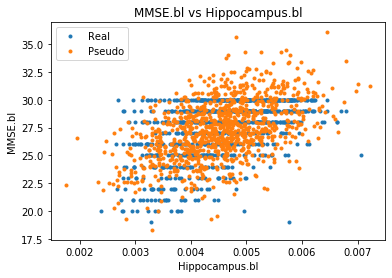

In [5]:
# Plot
def plot_real_synth(xcol='Hippocampus.bl', ycol='MMSE.bl'):
    plt.figure()
    plt.title(f'{ycol} vs {xcol}')
    plt.plot(real_adni[xcol], real_adni[ycol], '.')
    plt.plot(pseudo_adni[xcol], pseudo_adni[ycol], '.')
    plt.ylabel(ycol)
    plt.xlabel(xcol)
    plt.legend(['Real', 'Pseudo'])

plot_real_synth()

### Approximating a binary value with a scalar one

What do you think?

Is it acceptable?

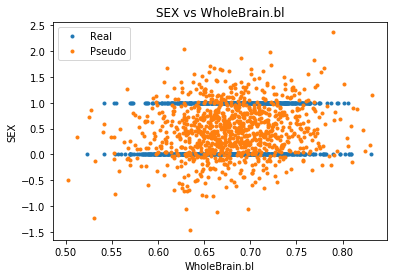

In [6]:
plot_real_synth(ycol='SEX', xcol='WholeBrain.bl')

In [7]:
# Save Data
pseudo_adni.to_csv('pseudo_adni.csv', index=False)